In [1]:
# Wide and Deep  Neural Networks 

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()    #in between parenthesis, for Google Colab Notebook , use ctrl+shift+spacebar to see all pre-defined functions

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from  sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#scaler will be used for standardisation so, we will do (x-(mean))/ (standard deviation) .
#scaler will use mean and standard deviation, will be trained/fit on the basis of training data.
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [11]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)               # last parenthesis in each line shows the connections.
concat=keras.layers.concatenate([input_,hidden2])                    
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=output)                # Earlier, we have made the layers and formed the connections , this line declares the input and output.
                                                                        # As name input and output will not help keras know about input and output layer.

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

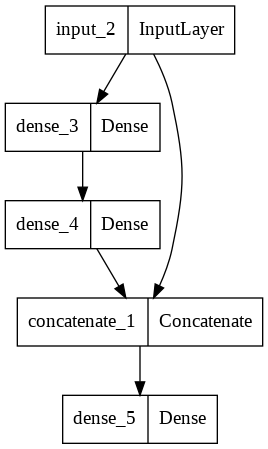

In [13]:
import pydot
keras.utils.plot_model(model)

In [14]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),  # lr= learning rate
              metrics=['mae'])                   # mae= mean absolute error

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
model_history= model.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [16]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4007 - mae: 0.4556


In [17]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980247497559,
  0.5107864141464233,
  0.4951668083667755,
  0.4802228510379791,
  0.4684668779373169,
  0.45896390080451965,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251030445099,
  0.4306240975856781,
  0.42534440755844116,
  0.4212935268878937,
  0.41681814193725586,
  0.4126456081867218,
  0.4095860719680786],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.558142364025116,
  0.542133629322052,
  0.529751718044281,
  0.518592119216919,
  0.5096290707588196,
  0.5025359988212585,
  0.4959278404712677,
  0.4896956980228424,
  0.48507025837898254,
  0.48114851117134094,
  0.47656989097595215,
  0.47358405590057373,
  0.4702601432800293,
  0.4676000773906708,
  0.4649645686149597,
  0.46159082651138306,
  0.46004408597946167],
 'val_loss': [0.8797987103462219,
  0.6420254111289978,
  0.589079737663269,
  0.54546719789505,
  

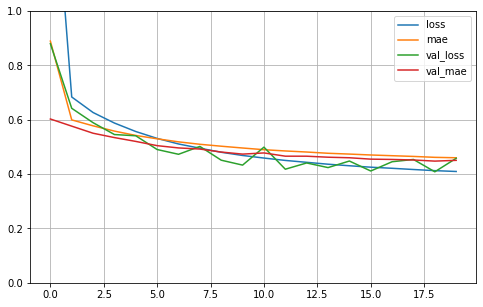

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
# Above code was used for plotting the graph.

In [20]:
# As here we see graph is still moving down ,so, we must run for bigger epochs to reduce our errors.

In [21]:
X_new= X_test[:3]

In [22]:
y_pred= model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 91ms/step
[[0.69968295]
 [1.662205  ]
 [3.4106717 ]]


In [23]:
print(y_test[:3])

[0.477   0.458   5.00001]
